<a href="https://colab.research.google.com/github/Anmolcool/CNN/blob/main/TransferLearning_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

In [ ]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [ ]:
IMAGE_SHAPE = (224, 224)

classification = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5",
                   input_shape = IMAGE_SHAPE + (3,))])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


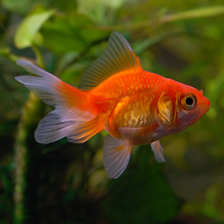

In [ ]:
gold_fish = Image.open('/content/goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [ ]:
result = classification.predict(gold_fish[np.newaxis, ...])

1/1 [==============================] - 9s 9s/step


In [ ]:
result

array([[ 0.16626889,  3.0337374 , 10.824696  , ..., -0.06034166,
        -0.1025512 ,  0.49458754]], dtype=float32)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
image_label = []

with open("/content/ImageNetLabels.txt", 'r') as f:
  image_label = f.read().splitlines()
image_label[:10]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [ ]:
image_label[predicted_label_index]

'goldfish'

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, cache_dir = '.', untar=True)


228813984/228813984 [==============================] - 12s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:10]

[PosixPath('datasets/flower_photos/sunflowers/4414083164_3f285f8ac5.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6482016439_b0d06dac04.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/22429146402_332fa2fc72_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4673984698_6ec14d5b79.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20871601265_daa4be4291_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9111896677_ff0b6fa6f6_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3897174387_07aac6bf5f_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15081164641_45a7b92b3a_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4933823300_39fd4420b6.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15122112402_cafa41934f.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:10]

[PosixPath('datasets/flower_photos/roses/20622485918_90fc000c86_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4609168052_3d4e1d3804_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2535495431_e6f950443c.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7147367479_f7a6ef0798.jpg'),
 PosixPath('datasets/flower_photos/roses/5360769702_ec28c53b9e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/509239741_28e2cfe492_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2265579414_2e00a8f265_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6936225976_a91b60d8c2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4575042086_7674b76297_n.jpg')]

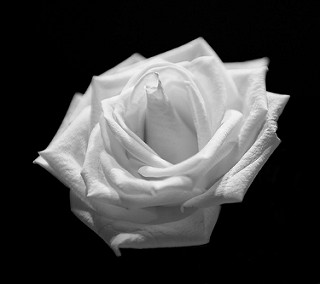

In [ ]:
Image.open(str(roses[1]))

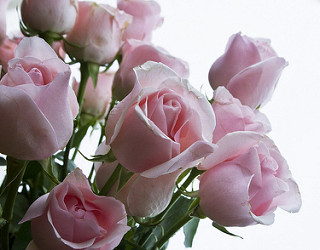

In [ ]:
Image.open(str(roses[5]))

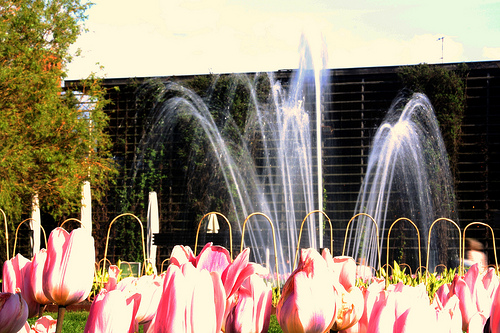

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[20]))

In [ ]:
flowers_image_dic = {

'daisy' : list(data_dir.glob('daisy/*')),
'dandelion' : list(data_dir.glob('dandelion/*')),
'roses' : list(data_dir.glob('roses/*')),
'sunflowers' : list(data_dir.glob('sunflowers/*')),
'tulips' : list(data_dir.glob('tulips/*'))

}

In [ ]:
flowers_labels_dict = {
    "roses" : 0 , 'daisy' :1, 'dandelion':2, 'sunflowers':3, 'tulips':4

}

In [ ]:
flowers_image_dic['roses'][:5]

[PosixPath('datasets/flower_photos/roses/20622485918_90fc000c86_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4609168052_3d4e1d3804_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2535495431_e6f950443c.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7147367479_f7a6ef0798.jpg')]

In [ ]:
img = cv2.imread(str(flowers_image_dic['roses'][0]))

In [ ]:
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img, (224,224)).shape

(224, 224, 3)